In [1]:
from pandas import pandas as pd
from tf_keras.preprocessing.text import Tokenizer
import pickle

data_train = pd.read_json("dataset-jamo-train.json")
X_train = data_train["message"]
Y_train = data_train["type"]

with open("tokenizer-jamo.pickle", 'rb') as handle:
        tokenizer = pickle.load(handle)
X_train = tokenizer.texts_to_sequences(X_train)

vocab_size = 124

2025-06-05 12:04:23.744789: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-05 12:04:23.745894: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 12:04:23.749744: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 12:04:23.759446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749092663.775611  559071 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749092663.78

KeyboardInterrupt: 

최대 길이 : 5160
평균 길이 : 445.2924883470778


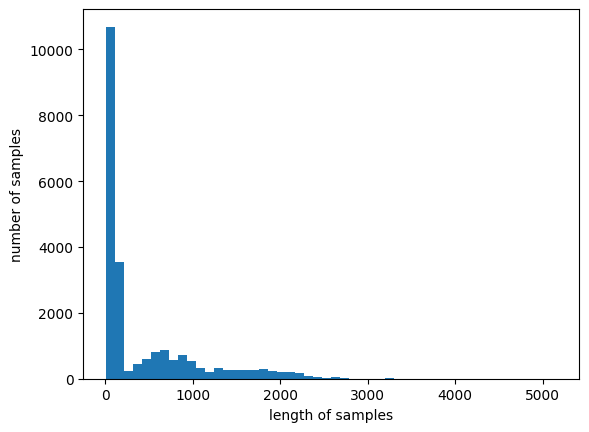

In [2]:
from matplotlib import pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [3]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [7]:
max_len = 800
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 800 이하인 샘플의 비율: 78.9575116529222


In [8]:
from tf_keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)

In [10]:
from tf_keras.layers import GRU, Embedding, Dense
from tf_keras.models import Sequential
from tf_keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 16
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('rnn-jamo.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])


Epoch 1/10
279/279 [==============================] - ETA: 0s - loss: 0.2625 - acc: 0.8942
Epoch 1: val_acc improved from -inf to 0.95183, saving model to rnn-jamo.keras
279/279 [==============================] - 73s 256ms/step - loss: 0.2625 - acc: 0.8942 - val_loss: 0.1614 - val_acc: 0.9518
Epoch 2/10
279/279 [==============================] - ETA: 0s - loss: 0.1487 - acc: 0.9569
Epoch 2: val_acc improved from 0.95183 to 0.96168, saving model to rnn-jamo.keras
279/279 [==============================] - 68s 244ms/step - loss: 0.1487 - acc: 0.9569 - val_loss: 0.1410 - val_acc: 0.9617
Epoch 3/10
279/279 [==============================] - ETA: 0s - loss: 0.1293 - acc: 0.9616
Epoch 3: val_acc did not improve from 0.96168
279/279 [==============================] - 68s 243ms/step - loss: 0.1293 - acc: 0.9616 - val_loss: 0.1338 - val_acc: 0.9601
Epoch 4/10
279/279 [==============================] - ETA: 0s - loss: 0.1144 - acc: 0.9660
Epoch 4: val_acc did not improve from 0.96168
279/279 [==